<a href="https://colab.research.google.com/github/TheeraphatKhiangphukhiao/artificial-intelligence/blob/main/AI_Section1_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf # ทำการนำเข้า tensorflow
from tensorflow.keras.datasets.mnist import load_data # ทำการนำเข้า dataset mnist

In [ ]:
# data มาตรฐานของตัว keras จะมีอยู่ 2 ส่วนคือ training set เเละ test set
(X_train, y_train), (X_test, y_test) = load_data()

In [ ]:
# ทำการเเสดงขนาดของรูปออกมา
print(X_train.shape) # มี data 60000 มีขนาด 28 x 28
print(X_test.shape) # มี data 10000 มีขนาด 28 x 28

(60000, 28, 28)
(10000, 28, 28)


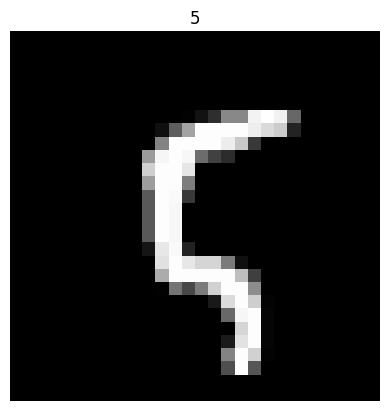

In [ ]:
# เเสดงรูปภาพออกมา
from matplotlib import pyplot as plt
def display_image(i):
  plt.imshow(X_train[i], cmap = 'gray')
  plt.title(y_train[i]) # เเสดง class ในที่นี้คือเลข 5
  plt.axis('off') # ไม่เเสดงเเกน

display_image(100)

In [ ]:
print(X_train[100])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2  18  46 136 136
  244 255 241 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15  94 163 253 253 253 253
  238 218 204  35   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 131 253 253 253 25

In [ ]:
X_train = X_train/255
print(X_train[100])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(10,4, input_shape=(28,28,1), activation='relu'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 25, 25, 10)        170       
                                                                 
Total params: 170 (680.00 Byte)
Trainable params: 170 (680.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(10,4, input_shape=(28,28,1), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))

#output layer
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 25, 25, 10)        170       
                                                                 
 flatten_14 (Flatten)        (None, 6250)              0         
                                                                 
 dense_25 (Dense)            (None, 100)               625100    
                                                                 
 dense_26 (Dense)            (None, 10)                1010      
                                                                 
Total params: 626280 (2.39 MB)
Trainable params: 626280 (2.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.optimizers import RMSprop
from keras.utils import to_categorical
model.compile(loss='categorical_crossentropy', optimizer = RMSprop(learning_rate=0.001), metrics=['acc'])
t_train = X_train.reshape(len(X_train), 28, 28, 1)
t_test = X_test.reshape(len(X_test,), 28, 28, 1)

yy_train = to_categorical(y_train)
yy_test =  to_categorical(y_test)

print(y_train[0])
print(yy_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
history = model.fit(t_train, yy_train, epochs=10, validation_data=(t_test, yy_test), batch_size=50)

Epoch 1/10
1200/1200 [==============================] - 26s 21ms/step - loss: 0.1739 - acc: 0.9477 - val_loss: 12.6817 - val_acc: 0.9750
Epoch 2/10
1200/1200 [==============================] - 24s 20ms/step - loss: 0.0580 - acc: 0.9831 - val_loss: 16.0741 - val_acc: 0.9743
Epoch 3/10
1200/1200 [==============================] - 24s 20ms/step - loss: 0.0374 - acc: 0.9882 - val_loss: 17.7316 - val_acc: 0.9730
Epoch 4/10
1200/1200 [==============================] - 24s 20ms/step - loss: 0.0249 - acc: 0.9924 - val_loss: 18.1509 - val_acc: 0.9764
Epoch 5/10
1200/1200 [==============================] - 24s 20ms/step - loss: 0.0177 - acc: 0.9945 - val_loss: 16.6015 - val_acc: 0.9807
Epoch 6/10
1200/1200 [==============================] - 25s 20ms/step - loss: 0.0124 - acc: 0.9959 - val_loss: 20.1093 - val_acc: 0.9768
Epoch 7/10
1200/1200 [==============================] - 23s 19ms/step - loss: 0.0083 - acc: 0.9974 - val_loss: 24.4256 - val_acc: 0.9743
Epoch 8/10
1200/1200 [===================

In [ ]:
acc = history.history['acc']
print(acc)

[0.9476833343505859, 0.9830666780471802, 0.988183319568634, 0.9924166798591614, 0.9944666624069214, 0.9958666563034058, 0.9974166750907898, 0.9982166886329651, 0.9987999796867371, 0.9990666508674622]


In [ ]:
val_acc = history.history['val_acc']
print(val_acc)

[0.9750000238418579, 0.9743000268936157, 0.9729999899864197, 0.9764000177383423, 0.9807000160217285, 0.9768000245094299, 0.9743000268936157, 0.9825999736785889, 0.9779999852180481, 0.9757999777793884]


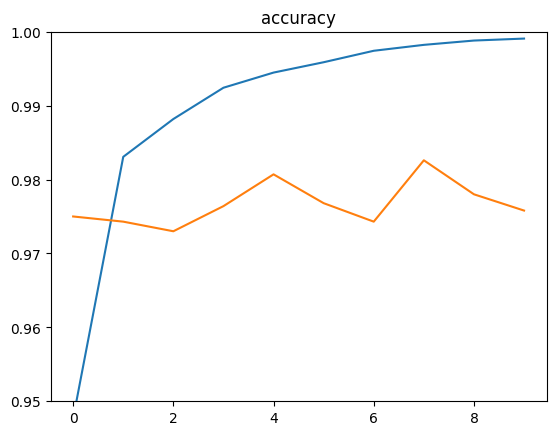

<Figure size 640x480 with 0 Axes>

In [ ]:
def plot_training(history, ymin=None):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  epoch = range(len(acc))
  plt.plot(epoch, acc)
  plt.plot(epoch, val_acc)
  if ymin:
    plt.ylim(ymin, 1.0)
  plt.title("accuracy")
  plt.figure()

plot_training(history, 0.95)